In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}


In [3]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import datetime
import seaborn as sns
%matplotlib inline

In [4]:
ps = pd.read_csv('pek-sha.csv')

In [5]:
ps.shape

(300336, 14)

In [6]:
ps.sort_values(['cabinClass'])

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
49923,1913594,HU7603,738,PEK,NaN,SHA,2019-01-11 21:25:00,2019-01-11 23:40:00,C,C,5660,1.00,2019-01-06 21:30:08,5
49922,1913524,MU5128,359,PEK,NaN,SHA,2019-01-11 21:00:00,2019-01-11 23:15:00,C,J,5360,1.00,2019-01-06 21:30:08,5
49921,1913498,MU5128,359,PEK,NaN,SHA,2019-01-11 21:00:00,2019-01-11 23:15:00,C,Q,2980,0.56,2019-01-06 21:30:08,5
49920,1913449,CA1589,773,PEK,NaN,SHA,2019-01-11 20:30:00,2019-01-11 22:40:00,C,J,5660,1.00,2019-01-06 21:30:08,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171785,71233949,CA1885,320,PEK,NaN,SHA,2019-07-02 18:30:00,2019-07-02 20:40:00,Y,Y,1490,1.00,2019-06-30 00:38:56,2
171786,71233953,FM9108,73L,PEK,NaN,SHA,2019-07-02 18:30:00,2019-07-02 20:50:00,Y,B,1350,0.99,2019-06-30 00:38:56,2
171787,71233954,FM9108,73L,PEK,NaN,SHA,2019-07-02 18:30:00,2019-07-02 20:50:00,Y,B,1350,0.99,2019-06-30 00:38:56,2
171778,71233939,MU5122,33L,PEK,NaN,SHA,2019-07-02 18:00:00,2019-07-02 20:15:00,Y,B,1480,0.99,2019-06-30 00:38:56,2


In [7]:
pd.crosstab(ps.priceClass, ps.cabinClass)

cabinClass,C,F,Y
priceClass,,,
A,279,7394,944
B,0,0,26576
BZ,0,0,2
C,9261,0,0
D,6274,0,0
E,0,0,1520
F,0,17100,0
G,0,0,7121
H,0,0,2863


In [8]:
ps.traAirport.fillna(0, inplace = True)

In [9]:
ps.traAirport.replace('LYA', 1, inplace =True)

In [10]:
ps.drop(['ID','flightNumber', 'depAirport', 'arrAirport', 'priceClass', 'rate'], axis=1, inplace=True)

In [11]:
ps.head()

,craftTypeCode,traAirport,departureDate,arrivalDate,cabinClass,price,createDate,dateDifference
0,320,0,2019-01-04 06:35:00,2019-01-04 08:55:00,C,1860,2019-01-03 14:26:15,1
1,33L,0,2019-01-04 07:00:00,2019-01-04 09:15:00,C,1640,2019-01-03 14:26:15,1
2,33L,0,2019-01-04 07:00:00,2019-01-04 09:15:00,C,5360,2019-01-03 14:26:15,1
3,350,0,2019-01-04 07:20:00,2019-01-04 09:35:00,C,1635,2019-01-03 14:26:15,1
4,350,0,2019-01-04 07:20:00,2019-01-04 09:35:00,C,1640,2019-01-03 14:26:15,1


In [12]:
ps.craftTypeCode.value_counts()

33L    59178
359    36896
333    31163
773    28022
325    16107
738    14067
321    11627
33A     9174
789     7915
747     7665
32L     7618
73E     7546
73L     7375
73K     6023
32A     5422
77W     5061
330     3995
350     3707
323     3405
338     3001
78A     2850
331     2806
33E     2796
744     2459
33G     2192
33H     1643
337     1613
320     1267
787     1144
78B     1106
332      925
73N      838
351      831
33W      613
336      473
319      381
73T      361
32M      350
33C      261
73B      251
73H      158
33B       42
73U        7
73G        2
Name: craftTypeCode, dtype: int64

In [13]:
ps.departureDate.describe()

count                  300336
unique                   8052
top       2019-01-21 18:30:00
freq                      156
Name: departureDate, dtype: object

In [14]:
ps['TOD']= [x[11:16] for x in ps.departureDate]

In [15]:
ps['DD'] = [x[:11] for x in ps.departureDate]

In [16]:
ps.TOD.unique()

array(['06:35', '07:00', '07:20', '07:30', '08:00', '08:10', '08:30',
       '09:00', '10:00', '10:30', '11:00', '11:30', '12:00', '13:30',
       '14:00', '14:30', '15:05', '15:30', '15:40', '16:00', '16:30',
       '16:55', '17:20', '17:30', '17:55', '18:30', '19:00', '19:30',
       '20:00', '20:30', '20:20', '21:00', '21:25', '21:30', '21:45',
       '08:05', '09:30', '13:00', '07:55', '07:50', '21:50', '21:20',
       '12:30', '14:05', '13:50', '07:45', '08:15', '08:45', '13:05',
       '15:00', '17:00', '18:00', '20:35', '21:05', '13:10', '06:50',
       '14:45', '16:05', '15:55', '14:40', '21:15', '12:15', '16:15',
       '19:40', '18:45', '10:50', '18:20', '16:10', '17:40', '06:40',
       '08:20', '14:50', '17:35', '20:50'], dtype=object)

In [17]:
type(ps['TOD'][1][1])

str

In [18]:
ps['TOD'] = pd.to_datetime(ps['TOD'])
ps['TOD'] = [time.time() for time in ps['TOD']]

In [19]:
ps['TODD']= np.where(((ps['TOD']> datetime.time(6,0)) & (ps['TOD']<= datetime.time(12,0))), 'M', np.nan)
ps['TODD'] = np.where(((ps['TOD']> datetime.time(12,0)) & (ps['TOD']<= datetime.time(18,0))), 'A', ps['TODD'])
ps['TODD'] = np.where(((ps['TOD']> datetime.time(18,0)) & (ps['TOD']<= datetime.time(23,0))), 'N', ps['TODD'])

In [20]:
ps['TODD'].value_counts()

M    124475
A     98375
N     77486
Name: TODD, dtype: int64

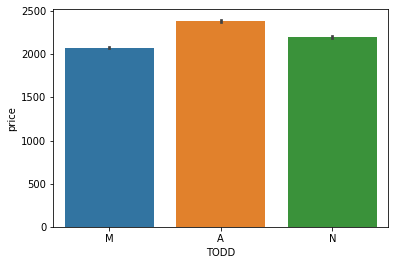

In [21]:
sns.barplot(x = ps['TODD'], y = ps['price'], data = ps)

In [118]:
ps['Month'] = [x[5:7] for x in ps['DD']]

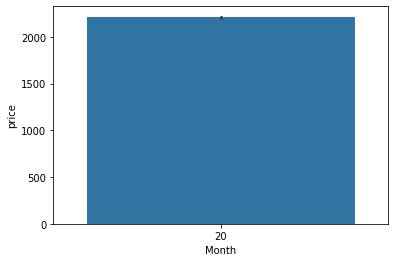

In [23]:
sns.barplot(x = ps['Month'], y = ps['price'], data = ps)

In [24]:
import datetime 
import calendar 
  
def findDay(date): 
    born = datetime.datetime.strptime(date, '%Y-%m-%d').weekday() 
    return (calendar.day_name[born]) 
  

date = '2019-01-04'
print(findDay(date))

Friday


In [25]:
ps['DD'] = [x[:10] for x in ps.departureDate]

In [26]:
ps['DOW'] = [findDay(x) for x in ps['DD']]

In [119]:
ps.head()

,traAirport,cabinClass,price,createDate,dateDifference,TOD,DD,TODD,Month,DOW,DOPD,PD,MOPD,TOPD,TOPD_L
0,0,C,260.4,2019-01-03 14:26:15,1,06:35:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
1,0,C,229.6,2019-01-03 14:26:15,1,07:00:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
2,0,C,750.4,2019-01-03 14:26:15,1,07:00:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
3,0,C,228.9,2019-01-03 14:26:15,1,07:20:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
4,0,C,229.6,2019-01-03 14:26:15,1,07:20:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A


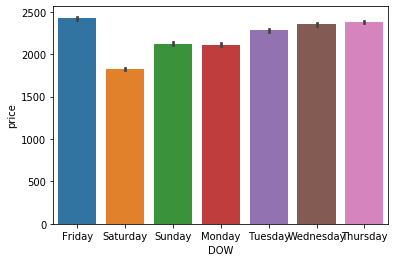

In [28]:
#Day of week departure v price 
sns.barplot(x = ps['DOW'], y = ps['price'], data = ps)

In [29]:
ps.groupby('DOW').price.mean()

DOW
Friday       2422.897362
Monday       2112.860735
Saturday     1825.639754
Sunday       2123.098638
Thursday     2377.709034
Tuesday      2279.078610
Wednesday    2349.446788
Name: price, dtype: float64

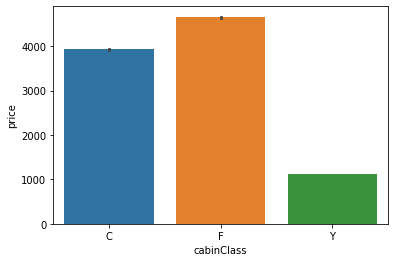

In [30]:
sns.barplot(x = ps['cabinClass'], y = ps['price'], data = ps)

In [31]:
ps['price'] = [x*.14 for x in ps['price']]

In [32]:
ps.head()

,craftTypeCode,traAirport,departureDate,arrivalDate,cabinClass,price,createDate,dateDifference,TOD,DD,TODD,Month,DOW
0,320,0,2019-01-04 06:35:00,2019-01-04 08:55:00,C,260.4,2019-01-03 14:26:15,1,06:35:00,2019-01-04,M,20,Friday
1,33L,0,2019-01-04 07:00:00,2019-01-04 09:15:00,C,229.6,2019-01-03 14:26:15,1,07:00:00,2019-01-04,M,20,Friday
2,33L,0,2019-01-04 07:00:00,2019-01-04 09:15:00,C,750.4,2019-01-03 14:26:15,1,07:00:00,2019-01-04,M,20,Friday
3,350,0,2019-01-04 07:20:00,2019-01-04 09:35:00,C,228.9,2019-01-03 14:26:15,1,07:20:00,2019-01-04,M,20,Friday
4,350,0,2019-01-04 07:20:00,2019-01-04 09:35:00,C,229.6,2019-01-03 14:26:15,1,07:20:00,2019-01-04,M,20,Friday


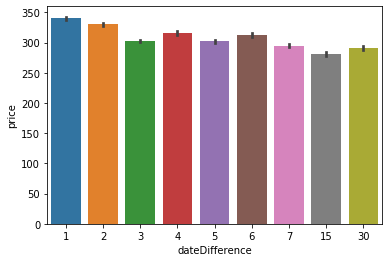

In [33]:
sns.barplot(x = ps['dateDifference'], y = ps['price'], data = ps)

In [34]:
ps.sort_values(['dateDifference'], ascending = False)

,craftTypeCode,traAirport,departureDate,arrivalDate,cabinClass,price,createDate,dateDifference,TOD,DD,TODD,Month,DOW
217804,738,0,2019-08-09 13:05:00,2019-08-09 15:30:00,Y,173.60,2019-07-10 18:04:34,30,13:05:00,2019-08-09,A,20,Friday
42040,33A,0,2019-06-21 15:30:00,2019-06-21 17:40:00,C,522.20,2019-05-22 09:26:41,30,15:30:00,2019-06-21,A,20,Friday
42032,789,0,2019-06-21 14:30:00,2019-06-21 16:40:00,C,417.20,2019-05-22 09:26:41,30,14:30:00,2019-06-21,A,20,Friday
42033,789,0,2019-06-21 14:30:00,2019-06-21 16:40:00,C,792.40,2019-05-22 09:26:41,30,14:30:00,2019-06-21,A,20,Friday
42034,789,0,2019-06-21 14:30:00,2019-06-21 16:40:00,C,522.20,2019-05-22 09:26:41,30,14:30:00,2019-06-21,A,20,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114498,321,0,2019-02-16 06:35:00,2019-02-16 08:55:00,Y,91.00,2019-02-15 11:35:03,1,06:35:00,2019-02-16,M,20,Saturday
114497,321,0,2019-02-16 06:35:00,2019-02-16 08:55:00,Y,85.40,2019-02-15 11:35:03,1,06:35:00,2019-02-16,M,20,Saturday
114496,321,0,2019-02-16 06:35:00,2019-02-16 08:55:00,Y,88.62,2019-02-15 11:35:03,1,06:35:00,2019-02-16,M,20,Saturday
114495,321,0,2019-02-16 06:35:00,2019-02-16 08:55:00,Y,86.80,2019-02-15 11:35:03,1,06:35:00,2019-02-16,M,20,Saturday


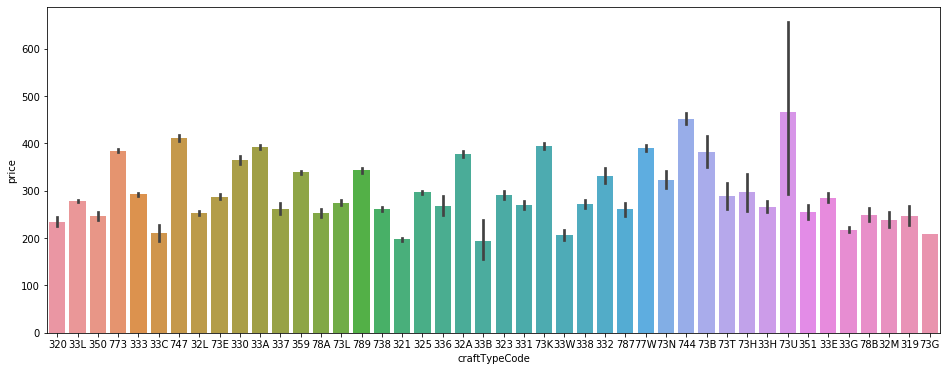

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.barplot(x = ps['craftTypeCode'], y = ps['price'], data = ps)


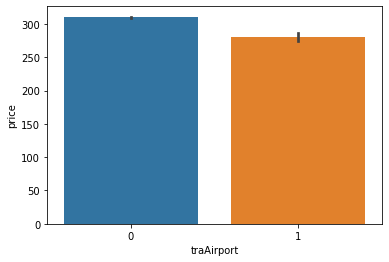

In [36]:
sns.barplot(x = ps['traAirport'], y = ps['price'], data = ps)

In [37]:
ps.drop(['craftTypeCode', 'departureDate', 'arrivalDate'], axis =1, inplace = True)

In [38]:
ps.head()

,traAirport,cabinClass,price,createDate,dateDifference,TOD,DD,TODD,Month,DOW
0,0,C,260.4,2019-01-03 14:26:15,1,06:35:00,2019-01-04,M,20,Friday
1,0,C,229.6,2019-01-03 14:26:15,1,07:00:00,2019-01-04,M,20,Friday
2,0,C,750.4,2019-01-03 14:26:15,1,07:00:00,2019-01-04,M,20,Friday
3,0,C,228.9,2019-01-03 14:26:15,1,07:20:00,2019-01-04,M,20,Friday
4,0,C,229.6,2019-01-03 14:26:15,1,07:20:00,2019-01-04,M,20,Friday


PD = purchase date;
TOPD = time of purchase date;
MOPD = month of purchase date;
DOPD = day of week of purchas date


In [39]:
ps['DOPD'] = [x[:10] for x in ps['createDate']]

In [40]:
ps['PD'] = [x[:10] for x in ps['createDate']]

In [41]:
ps['DOPD'] = [findDay(x) for x in ps['DOPD']]

In [42]:
ps['MOPD'] = [x[5:7] for x in ps['PD']]

In [43]:
ps['TOPD'] = [x[11:16] for x in ps['createDate']]

In [44]:
ps['TOPD'] = pd.to_datetime(ps['TOPD'])
ps['TOPD'] = [time.time() for time in ps['TOPD']]
ps['TOPD_L']= np.where(((ps['TOPD']> datetime.time(6,0)) & (ps['TOPD']<= datetime.time(12,0))), 'M', np.nan)
ps['TOPD_L'] = np.where(((ps['TOPD']> datetime.time(12,0)) & (ps['TOPD']<= datetime.time(18,0))), 'A', ps['TOPD_L'])
ps['TOPD_L'] = np.where(((ps['TOPD']> datetime.time(18,0)) & (ps['TOPD']<= datetime.time(23,0))), 'N', ps['TOPD_L'])

In [120]:
ps.head()

,traAirport,cabinClass,price,createDate,dateDifference,TOD,DD,TODD,Month,DOW,DOPD,PD,MOPD,TOPD,TOPD_L
0,0,C,260.4,2019-01-03 14:26:15,1,06:35:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
1,0,C,229.6,2019-01-03 14:26:15,1,07:00:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
2,0,C,750.4,2019-01-03 14:26:15,1,07:00:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
3,0,C,228.9,2019-01-03 14:26:15,1,07:20:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
4,0,C,229.6,2019-01-03 14:26:15,1,07:20:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A


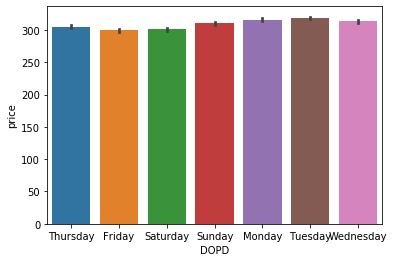

In [46]:
sns.barplot(x = ps['DOPD'], y = ps['price'], data = ps)

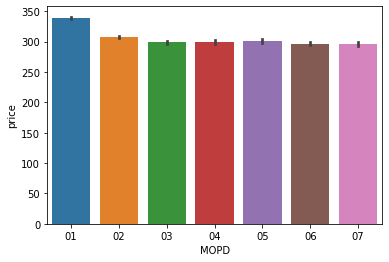

In [47]:
sns.barplot(x = ps['MOPD'], y = ps['price'], data = ps)

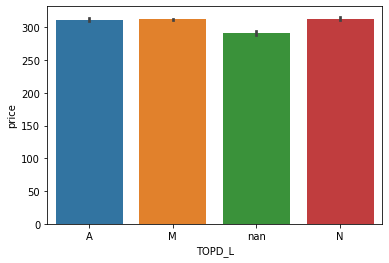

In [48]:
sns.barplot(x = ps['TOPD_L'], y = ps['price'], data = ps)

In [77]:
sp = pd.read_csv('sha-pek.csv')

In [78]:
sp.head()

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,78246995,CA1550,77W,SHA,NaN,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,Z,2980,0.52,2019-07-17 02:32:27,-1
1,78246997,CA1550,77W,SHA,NaN,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,J,5810,1.00,2019-07-17 02:32:27,-1
2,78246998,CA1550,77W,SHA,NaN,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,D,3730,0.65,2019-07-17 02:32:27,-1
3,78246999,CA1550,77W,SHA,NaN,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,C,4170,0.72,2019-07-17 02:32:27,-1
4,78247002,MU5125,33L,SHA,NaN,PEK,2019-07-16 20:05:00,2019-07-16 22:10:00,C,I,2000,0.36,2019-07-17 02:32:27,-1


In [79]:
sp.drop(['ID','flightNumber', 'craftTypeCode', 'depAirport', 'arrAirport', 'arrivalDate', 'priceClass', 'rate'], axis = 1, inplace = True)

In [80]:
sp.head()

,traAirport,departureDate,cabinClass,price,createDate,dateDifference
0,NaN,2019-07-16 19:55:00,C,2980,2019-07-17 02:32:27,-1
1,NaN,2019-07-16 19:55:00,C,5810,2019-07-17 02:32:27,-1
2,NaN,2019-07-16 19:55:00,C,3730,2019-07-17 02:32:27,-1
3,NaN,2019-07-16 19:55:00,C,4170,2019-07-17 02:32:27,-1
4,NaN,2019-07-16 20:05:00,C,2000,2019-07-17 02:32:27,-1


In [81]:
sp.traAirport.fillna(0, inplace = True)

In [82]:
sp.traAirport.replace('LYA', 1, inplace =True)

In [83]:
sp['price'] = [x * .14 for x in sp.price]

In [85]:
sp.dateDifference = np.where(sp.dateDifference == -1, np.nan, sp.dateDifference)

In [91]:
sp.dropna(inplace=True)

In [100]:
sp['TOD']= [x[11:16] for x in sp.departureDate]

In [105]:
sp['DD'] = [x[:10] for x in sp.departureDate]

In [107]:
sp['TOD'] = pd.to_datetime(sp['TOD'])
sp['TOD'] = [time.time() for time in sp['TOD']]
sp['TODD']= np.where(((sp['TOD']> datetime.time(6,0)) & (sp['TOD']<= datetime.time(12,0))), 'M', np.nan)
sp['TODD'] = np.where(((sp['TOD']> datetime.time(12,0)) & (sp['TOD']<= datetime.time(18,0))), 'A', sp['TODD'])
sp['TODD'] = np.where(((sp['TOD']> datetime.time(18,0)) & (sp['TOD']<= datetime.time(23,0))), 'N', sp['TODD'])

In [108]:
sp.head()

,traAirport,departureDate,cabinClass,price,createDate,dateDifference,TOD,DD,TODD
19,0,2019-05-01 07:00:00,C,218.4,2019-05-01 02:07:29,0.0,07:00:00,2019-05-01,M
20,0,2019-05-01 07:00:00,C,792.4,2019-05-01 02:07:29,0.0,07:00:00,2019-05-01,M
21,0,2019-05-01 07:55:00,C,291.2,2019-05-01 02:07:29,0.0,07:55:00,2019-05-01,M
22,0,2019-05-01 07:55:00,C,792.4,2019-05-01 02:07:29,0.0,07:55:00,2019-05-01,M
23,0,2019-05-01 08:00:00,C,218.4,2019-05-01 02:07:29,0.0,08:00:00,2019-05-01,M


In [116]:
sp['Month'] = [x[5:7] for x in sp.DD]

In [121]:
sp['DOW'] = [findDay(x) for x in sp.DD]

In [123]:
ps.head()

,traAirport,cabinClass,price,createDate,dateDifference,TOD,DD,TODD,Month,DOW,DOPD,PD,MOPD,TOPD,TOPD_L
0,0,C,260.4,2019-01-03 14:26:15,1,06:35:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
1,0,C,229.6,2019-01-03 14:26:15,1,07:00:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
2,0,C,750.4,2019-01-03 14:26:15,1,07:00:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
3,0,C,228.9,2019-01-03 14:26:15,1,07:20:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A
4,0,C,229.6,2019-01-03 14:26:15,1,07:20:00,2019-01-04,M,01,Friday,Thursday,2019-01-03,01,14:26:00,A


In [124]:
sp['TOPD'] = [x[11:16] for x in sp.createDate]

In [126]:
sp['PD'] = [x[:10] for x in sp.createDate]

In [128]:
sp['MOPD'] = [x[5:7] for x in sp.createDate]

In [131]:
sp['DOPD'] = [findDay(x) for x in sp.PD]

,traAirport,departureDate,cabinClass,price,createDate,dateDifference,TOD,DD,TODD,Month,DOW,TOPD,PD,MOPD,DOPD
19,0,2019-05-01 07:00:00,C,218.4,2019-05-01 02:07:29,0.0,07:00:00,2019-05-01,M,05,Wednesday,02:07,2019-05-01,05,Wednesday
20,0,2019-05-01 07:00:00,C,792.4,2019-05-01 02:07:29,0.0,07:00:00,2019-05-01,M,05,Wednesday,02:07,2019-05-01,05,Wednesday
21,0,2019-05-01 07:55:00,C,291.2,2019-05-01 02:07:29,0.0,07:55:00,2019-05-01,M,05,Wednesday,02:07,2019-05-01,05,Wednesday
22,0,2019-05-01 07:55:00,C,792.4,2019-05-01 02:07:29,0.0,07:55:00,2019-05-01,M,05,Wednesday,02:07,2019-05-01,05,Wednesday
23,0,2019-05-01 08:00:00,C,218.4,2019-05-01 02:07:29,0.0,08:00:00,2019-05-01,M,05,Wednesday,02:07,2019-05-01,05,Wednesday


In [133]:
sp['TOPD'] = pd.to_datetime(sp['TOPD'])
sp['TOPD'] = [time.time() for time in sp['TOPD']]
sp['TOPD_L']= np.where(((sp['TOPD']> datetime.time(6,0)) & (sp['TOPD']<= datetime.time(12,0))), 'M', np.nan)
sp['TOPD_L'] = np.where(((sp['TOPD']> datetime.time(12,0)) & (sp['TOPD']<= datetime.time(18,0))), 'A', sp['TOPD_L'])
sp['TOPD_L'] = np.where(((sp['TOPD']> datetime.time(18,0)) & (sp['TOPD']<= datetime.time(23,0))), 'N', sp['TOPD_L'])

In [134]:
sp.head()

,traAirport,departureDate,cabinClass,price,createDate,dateDifference,TOD,DD,TODD,Month,DOW,TOPD,PD,MOPD,DOPD,TOPD_L
19,0,2019-05-01 07:00:00,C,218.4,2019-05-01 02:07:29,0.0,07:00:00,2019-05-01,M,05,Wednesday,02:07:00,2019-05-01,05,Wednesday,nan
20,0,2019-05-01 07:00:00,C,792.4,2019-05-01 02:07:29,0.0,07:00:00,2019-05-01,M,05,Wednesday,02:07:00,2019-05-01,05,Wednesday,nan
21,0,2019-05-01 07:55:00,C,291.2,2019-05-01 02:07:29,0.0,07:55:00,2019-05-01,M,05,Wednesday,02:07:00,2019-05-01,05,Wednesday,nan
22,0,2019-05-01 07:55:00,C,792.4,2019-05-01 02:07:29,0.0,07:55:00,2019-05-01,M,05,Wednesday,02:07:00,2019-05-01,05,Wednesday,nan
23,0,2019-05-01 08:00:00,C,218.4,2019-05-01 02:07:29,0.0,08:00:00,2019-05-01,M,05,Wednesday,02:07:00,2019-05-01,05,Wednesday,nan
